# **⭐ Ensemble Model**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Boston.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
y = df['MEDV']

In [5]:
X = df.drop('MEDV', axis=1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)

## **Decision Tree**

In [8]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [9]:
dtr=DecisionTreeRegressor()

In [10]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [11]:
y_pred=dtr.predict(X_test)

In [12]:
mean_absolute_percentage_error(y_test,y_pred)

0.14432554247642204

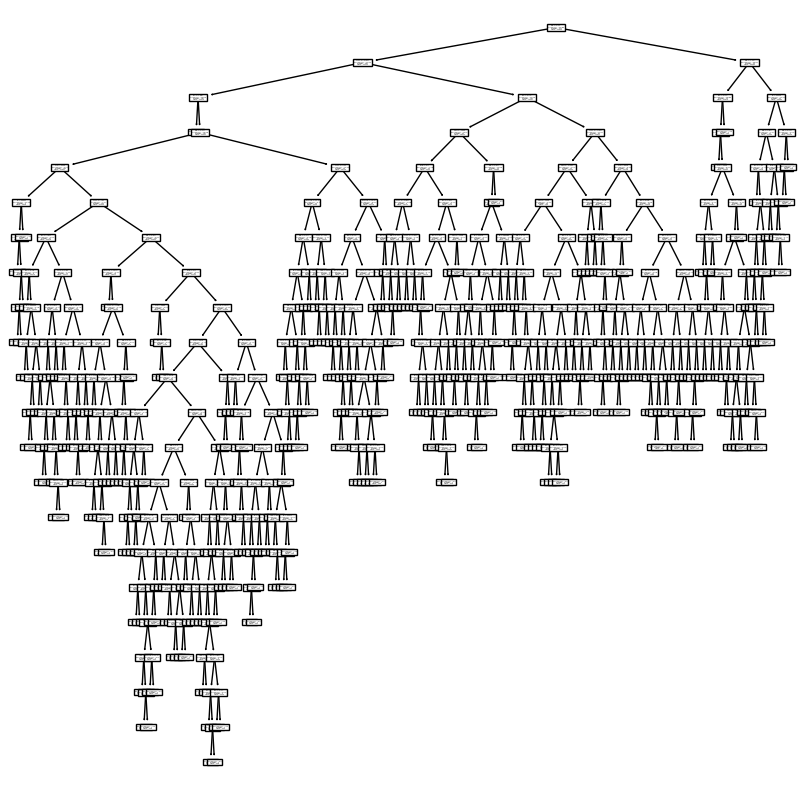

In [13]:
fig, ax = plt.subplots(figsize=(10, 10)) 
plot_tree(dtr,feature_names=X.columns);

In [14]:
params = {'max_depth':[1,5,10,15,20,25]}

In [15]:
gs_dtr = GridSearchCV(estimator=dtr, param_grid=params, cv=5, scoring='neg_mean_squared_error',return_train_score=True, verbose=1)

In [16]:
gs_dtr.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 5, 10, 15, 20, 25]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [17]:
pd.DataFrame(gs_dtr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010856,0.001304,0.008226,0.001357,1,{'max_depth': 1},-53.759498,-53.643303,-54.763159,-50.052597,...,-54.148687,2.709740,6,-46.206236,-46.096082,-47.995977,-47.160014,-45.758332,-46.643328,0.821020
1,0.013897,0.000939,0.006284,0.000793,5,{'max_depth': 5},-21.867135,-13.091787,-41.149978,-26.833178,...,-22.418814,11.257437,5,-5.892778,-5.984359,-6.654910,-6.004573,-6.591695,-6.225663,0.327461
2,0.019006,0.012095,0.004734,0.001498,10,{'max_depth': 10},-15.765529,-9.595335,-33.702384,-28.110337,...,-20.260992,9.097482,1,-0.690366,-0.872620,-0.822489,-0.645129,-0.770788,-0.760278,0.083365
3,0.009567,0.001660,0.028775,0.052142,15,{'max_depth': 15},-17.226299,-10.804439,-41.620727,-26.729737,...,-21.940287,11.232032,2,-0.003067,-0.015552,-0.035770,-0.014666,-0.028667,-0.019544,0.011469
4,0.013542,0.000375,0.004564,0.000494,20,{'max_depth': 20},-24.027632,-10.451842,-32.604375,-28.050921,...,-22.335354,7.946888,4,-0.000000,-0.000000,-0.000017,-0.000000,-0.000000,-0.000003,0.000007
5,0.010996,0.000634,0.004156,0.000709,25,{'max_depth': 25},-23.312895,-9.191053,-35.557895,-26.343026,...,-22.243907,8.888886,3,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000


In [18]:
gs_dtr.best_estimator_

DecisionTreeRegressor(max_depth=10)

In [19]:
y_pred = gs_dtr.predict(X_test)

In [20]:
mean_absolute_percentage_error(y_test,y_pred)

0.1429091537200741

In [21]:
rs_dtr = RandomizedSearchCV(estimator=dtr, param_distributions=params, cv=5, scoring='neg_mean_squared_error',return_train_score=True, verbose=1)

In [22]:
rs_dtr.fit(X_train,y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [1, 5, 10, 15, 20, 25]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [23]:
pd.DataFrame(rs_dtr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008221,0.002576,0.003854,0.000294,1,{'max_depth': 1},-53.759498,-53.643303,-54.763159,-50.052597,...,-54.148687,2.709740,6,-46.206236,-46.096082,-47.995977,-47.160014,-45.758332,-46.643328,0.821020
1,0.006301,0.001223,0.003460,0.001199,5,{'max_depth': 5},-13.434273,-13.091787,-32.528926,-27.455401,...,-19.132476,9.135704,1,-5.892778,-5.984359,-6.654910,-6.004573,-6.591695,-6.225663,0.327461
2,0.007383,0.001001,0.002874,0.000409,10,{'max_depth': 10},-15.791559,-10.262966,-40.612022,-25.331361,...,-21.290404,10.846482,2,-0.690366,-0.872620,-0.822489,-0.645129,-0.770788,-0.760278,0.083365
3,0.008675,0.001836,0.003837,0.001867,15,{'max_depth': 15},-24.964984,-9.887465,-34.454543,-27.505541,...,-21.987866,9.161487,4,-0.003067,-0.015552,-0.035770,-0.014666,-0.028667,-0.019544,0.011469
4,0.010068,0.000944,0.003305,0.000408,20,{'max_depth': 20},-24.208947,-9.847500,-34.355559,-26.642368,...,-21.793835,8.853610,3,-0.000000,-0.000000,-0.000017,-0.000000,-0.000000,-0.000003,0.000007
5,0.010092,0.001028,0.003565,0.000580,25,{'max_depth': 25},-23.474342,-9.766447,-40.757368,-28.630658,...,-23.478883,10.853931,5,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000


In [24]:
rs_dtr.best_estimator_

DecisionTreeRegressor(max_depth=5)

In [25]:
y_pred = rs_dtr.predict(X_test)

In [26]:
mean_absolute_percentage_error(y_test,y_pred)

0.14390737200679266

## **Random Forest**

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rfr = RandomForestRegressor()

In [29]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [30]:
y_pred=rfr.predict(X_test)

In [31]:
mean_absolute_percentage_error(y_test,y_pred)

0.11695789382200422

In [32]:
params = {'max_depth':[1,5,10,15,20,25]}

In [33]:
gs_rfr = GridSearchCV(estimator=rfr, param_grid=params, cv=5, scoring='neg_mean_squared_error',return_train_score=True, verbose=1)

In [34]:
gs_rfr.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 5, 10, 15, 20, 25]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [35]:
pd.DataFrame(gs_rfr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.356014,0.075097,0.028034,0.009061,1,{'max_depth': 1},-42.624713,-36.623128,-32.710163,-39.642719,...,-39.527264,4.623262,6,-33.747249,-33.856156,-35.470137,-35.667720,-36.462576,-35.040768,1.065407
1,0.308872,0.006543,0.018133,0.000909,5,{'max_depth': 5},-19.210190,-11.314033,-8.105436,-10.855270,...,-12.141998,3.726530,5,-4.457000,-4.928832,-4.624414,-5.174672,-5.246701,-4.886324,0.305856
2,0.397384,0.021534,0.018374,0.000834,10,{'max_depth': 10},-17.060990,-9.746343,-7.457047,-11.132244,...,-11.096362,3.214583,2,-1.671490,-2.082540,-1.811941,-2.194968,-2.161013,-1.984391,0.206309
3,0.451207,0.055929,0.019745,0.002107,15,{'max_depth': 15},-16.412288,-9.657318,-7.826164,-11.421465,...,-11.289675,2.861614,3,-1.750855,-2.273680,-1.404064,-1.993757,-2.034392,-1.891350,0.294724
4,0.476958,0.008999,0.022222,0.001334,20,{'max_depth': 20},-17.994907,-9.655957,-7.728626,-10.286939,...,-11.310101,3.506512,4,-1.699020,-1.968661,-1.751006,-2.115703,-1.962108,-1.899299,0.153421
5,0.533870,0.027581,0.026017,0.004312,25,{'max_depth': 25},-16.663657,-9.515543,-7.716819,-9.894848,...,-10.791700,3.058011,1,-1.625892,-1.954811,-1.748588,-1.858930,-2.041377,-1.845920,0.147048


In [36]:
gs_rfr.best_estimator_

RandomForestRegressor(max_depth=25)

In [37]:
y_pred = gs_rfr.predict(X_test)

In [38]:
mean_absolute_percentage_error(y_test,y_pred)

0.1116952890120035

In [39]:
rs_rfr = RandomizedSearchCV(estimator=rfr, param_distributions=params, cv=5, scoring='neg_mean_squared_error',return_train_score=True, verbose=1)

In [40]:
rs_rfr.fit(X_train,y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [1, 5, 10, 15, 20, 25]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [41]:
pd.DataFrame(rs_rfr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.327897,0.038043,0.019877,0.001617,1,{'max_depth': 1},-42.176404,-35.893821,-32.073685,-37.317240,...,-38.229096,4.231192,6,-32.934257,-33.871721,-35.014770,-34.061743,-35.306414,-34.237781,0.849689
1,0.360218,0.034658,0.021211,0.003220,5,{'max_depth': 5},-16.838564,-11.837093,-8.756069,-12.333671,...,-12.209573,2.621752,5,-4.556344,-5.403978,-4.623928,-5.317867,-5.079785,-4.996381,0.348941
2,0.497931,0.101583,0.023108,0.005286,10,{'max_depth': 10},-17.229127,-9.866857,-6.916984,-9.281868,...,-10.475720,3.521552,1,-1.839120,-2.096502,-1.875268,-2.149080,-1.922325,-1.976459,0.123483
3,0.492490,0.106321,0.021182,0.007492,15,{'max_depth': 15},-17.768505,-9.168979,-7.964906,-10.212616,...,-11.296225,3.426145,3,-1.703432,-2.044844,-1.578659,-2.024869,-2.160972,-1.902555,0.222056
4,0.554078,0.028625,0.021632,0.001573,20,{'max_depth': 20},-16.999508,-9.919193,-7.373324,-10.219238,...,-11.347086,3.219343,4,-1.676475,-2.198313,-1.634996,-1.917352,-2.208560,-1.927139,0.245361
5,0.442140,0.039611,0.019840,0.003784,25,{'max_depth': 25},-16.028774,-9.904059,-7.101930,-11.778634,...,-11.253893,2.904361,2,-1.831145,-1.958506,-1.636914,-1.939889,-1.962714,-1.865834,0.124150


In [42]:
rs_rfr.best_estimator_

RandomForestRegressor(max_depth=10)

In [43]:
y_pred = rs_rfr.predict(X_test)

In [44]:
mean_absolute_percentage_error(y_test,y_pred)

0.1183627009153582

## **XGBoost**

In [46]:
import xgboost as xgb

In [47]:
from xgboost import XGBRegressor

In [48]:
xgb = XGBRegressor(n_estimators=1000, max_depth=7)

In [49]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [50]:
xgb.plot_importance(xgb)

AttributeError: 'XGBRegressor' object has no attribute 'plot_importance'

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.11413681392794102

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor()

In [ ]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = gbr.predict(X_test)

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.12460032718090133